In [26]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.datasets import mnist
from keras.datasets import imdb

In [27]:
# Basic Neural Network.  With 11 inputs and 1 output node.

model = keras.Sequential([
    layers.Dense(units=1, input_shape=[11])
])

In [28]:
# Build the model and print the summary of the layers.


model.build()
#model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 12        
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Let's examine the weights in the network.  They are randomly initialized. 
w, b = model.weights

print(w)

<tf.Variable 'dense_5/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[ 0.5173426 ],
       [-0.6655631 ],
       [-0.640607  ],
       [-0.43796578],
       [ 0.31600052],
       [-0.4085862 ],
       [ 0.45264786],
       [-0.6958325 ],
       [-0.31441295],
       [-0.02871853],
       [-0.13204217]], dtype=float32)>


In [30]:
#MNist Dataset.  Contains hand written digits from 0-9.

#60,000 training images and 10,000 test images.

# Load the data into Numpy arrays.  One of the images and one for the labels.
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [31]:
#How many images are in the training data. 60,000 28x28 pixels
train_data.shape

(60000, 28, 28)

In [32]:
# 8 bit integer 
train_data.dtype

dtype('uint8')

In [33]:
#Let's examine the first image array.

train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

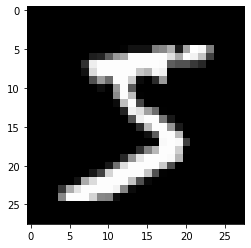

In [34]:
# What number is it?

plt.imshow(train_data[0], cmap='gray')

In [35]:
#  It matches the label.
train_labels[0]

5

In [36]:
#Convert Data to 1D array from 2D.  Normalize image data between 0 and 1.as_integer_ratio

train_images = train_data.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_data.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [37]:
# 1D array of image information in a 2D array.  Note:  The first dimension stores the individual images.
train_images.shape

(60000, 784)

In [38]:
# Now we have floating point values between 0-1.
train_images.dtype

dtype('float32')

In [39]:
# Simple two layer network.  The final layer has the same number of units as the output classes.  Digits between 0-9 equals 10 output classes.

model = keras.Sequential([
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])

In [40]:
# Let's build the model for our 28 * 28 (784) length array.

model.build((None, 28*28))

In [41]:
# Summary of the model.  Notice how many Parameters the model has!  These contain the trainable weights in our network.

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Compile our model with an optimizer (process to update weights) and loss (calculate the difference between the correct label and the output label).
# Also track the accuracy of the network during traning.

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [43]:
#  Train the network on the train images and the corresponding labels.  Send all the images through the network five times (epochs).
#  Update the weights after each 128 image batch.

model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2568 - accuracy: 0.9266
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1034 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0684 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0503 - accuracy: 0.9846
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0375 - accuracy: 0.9893


In [44]:
# What is the accuracy of the network on the test data.

results = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.0622 - accuracy: 0.9816


In [45]:
#  Let's check the prediction on the first test image.  Notice that the array position 7 is the highest. 
model.predict(test_images)[0]

array([1.8669130e-08, 5.4947682e-11, 2.4410404e-06, 2.5164150e-04,
       2.2967067e-11, 9.5311357e-08, 1.3263807e-14, 9.9974245e-01,
       4.1840366e-07, 2.9420710e-06], dtype=float32)

In [47]:
# Let's check if it's correct.

print(test_labels[0])

7


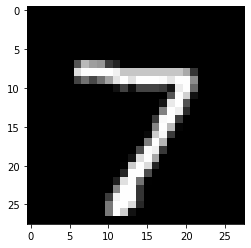

In [46]:
# Let's check if it's correct

plt.imshow(test_data[0], cmap='gray')